In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(font_scale=.75)

## Ett annat sätt att titta på MNIST

Det är förstås rimligt att tänka på MNIST-datan utifrån att varje handskriven siffra är en observation - det är ju så vi tränar modellen.

Ett annat sätt att göra MNIST-datan *tidy* är att tänka på varje *pixel* som en observation. Det är trots allt de enskilda pixlarna som utgör våra *features*.

Vi laddar in en lite annorlunda version av MNIST-datan.

In [2]:
df_wide = pd.read_csv("mnist_train.csv", header=None, nrows=50)
# df = df[:300]

In [4]:
df_wide.rename({0: "label"}, axis=1, inplace=True)
df_wide.insert(1, "instance",  df_wide.index + 1)

In [18]:
df_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 786 entries, label to 784
dtypes: int64(786)
memory usage: 307.2 KB


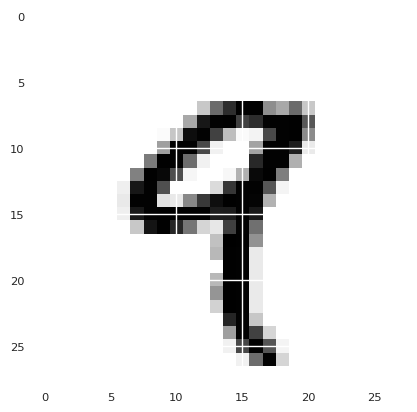

In [13]:
first_instance = df_wide.iloc[4]
plt.imshow(first_instance[2:].values.reshape(28, 28), cmap="binary")


### *Wide* och *long* data 
Vad vi är ute efter är att göra om datan från *wide* till *long*, det vill säga minska antalet kolumner och istället öka antalet rader.

*Notera att vi inte kommer att träna modeller på vårt "långa" dataset - det här är ett sätt för oss att ytterligare lära känna vårt dataset.*

För att formatera vårt dataset från *wide* till *long* använder vi pandas-funktionen `melt()`. Vi anger vilka kolumner vi vill behålla som kolumner, i det här fallet `label` och `instance`. De övriga kolumnerna kommer att slås ihop till en enda kolumn, som vi kallar `pixel`.

In [14]:
df_long = pd.melt(df_wide, id_vars=["label", "instance"], var_name="pixel")

In [17]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39200 entries, 0 to 39199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     39200 non-null  int64 
 1   instance  39200 non-null  int64 
 2   pixel     39200 non-null  object
 3   value     39200 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


In [19]:
df_long.head()

,label,instance,pixel,value
0,5,1,1,0
1,0,2,1,0
2,4,3,1,0
3,1,4,1,0
4,9,5,1,0


In [20]:
df_long["pixel"] = df_long["pixel"] - 1

In [21]:
df_long.head()

,label,instance,pixel,value
0,5,1,0,0
1,0,2,0,0
2,4,3,0,0
3,1,4,0,0
4,9,5,0,0


In [28]:
df_long["x"] = df_long["pixel"] % 28
df_long["y"] = (28 - df_long["pixel"] // 28) - 1

In [29]:
df_long.head()

,label,instance,pixel,value,x,y
0,5,1,0,0,0,27
1,0,2,0,0,0,27
2,4,3,0,0,0,27
3,1,4,0,0,0,27
4,9,5,0,0,0,27


<Axes: xlabel='value', ylabel='Count'>

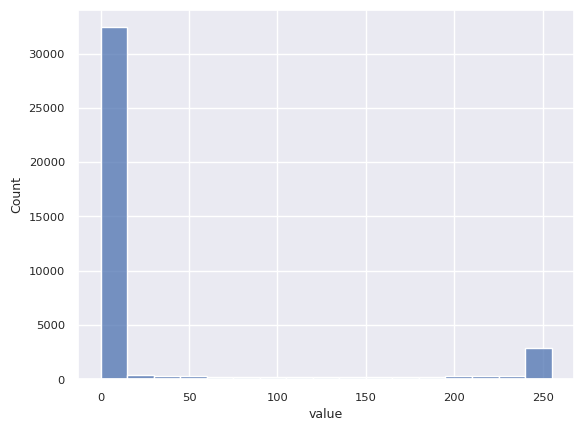

In [25]:
sns.histplot(df_long["value"])

In [30]:
label_means = df_long.groupby(["x", "y", "label"])["value"].mean().to_frame().reset_index()

In [34]:
label_means.loc[3500:3510]

,x,y,label,value
3500,12,14,0,125.500000
3501,12,14,1,4.142857
3502,12,14,2,31.250000
3503,12,14,3,226.000000
3504,12,14,4,73.250000
3505,12,14,5,135.750000
3506,12,14,6,72.400000
3507,12,14,7,0.000000
3508,12,14,8,153.250000
3509,12,14,9,108.428571


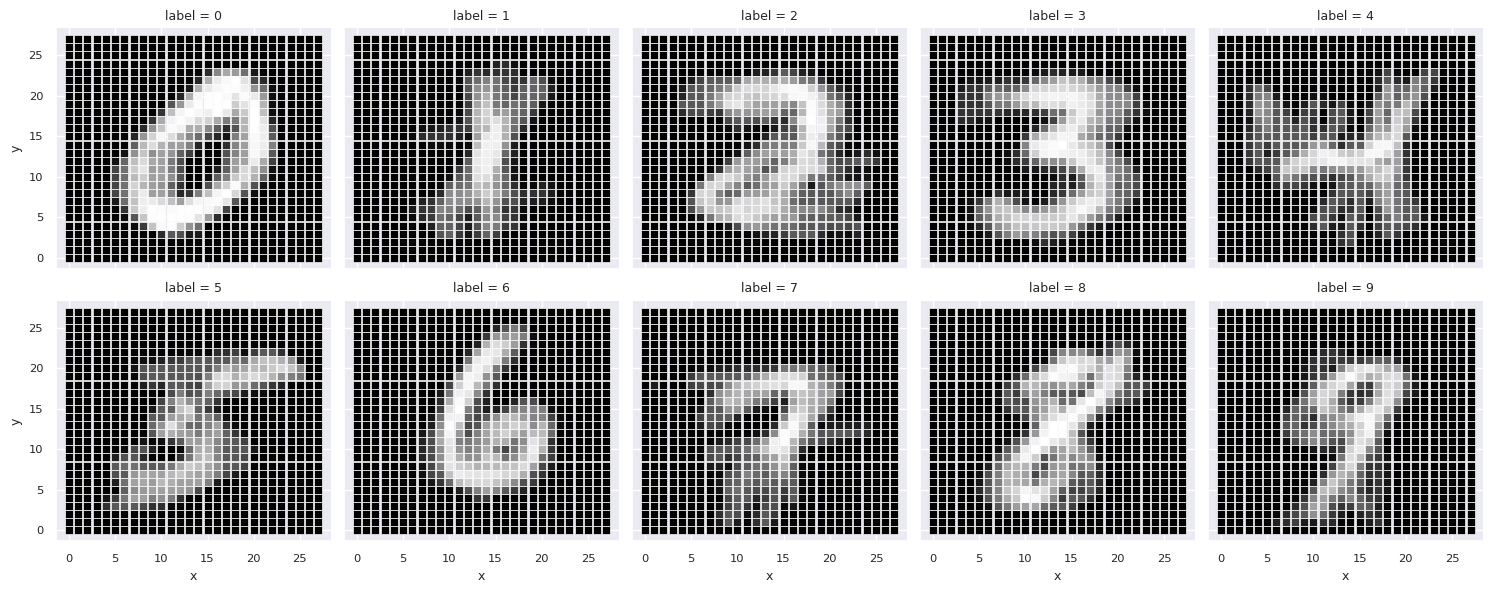

In [38]:
g = sns.FacetGrid(label_means, col="label", hue="value", col_wrap=5, palette="gray")
g.map(sns.scatterplot, "x", "y", marker="s")

In [39]:
first_12 = df_long[df_long.instance <= 12]

In [40]:
first_12

,label,instance,pixel,value,x,y
0,5,1,0,0,0,27
1,0,2,0,0,0,27
2,4,3,0,0,0,27
3,1,4,0,0,0,27
4,9,5,0,0,0,27
...,...,...,...,...,...,...
39157,3,8,783,0,27,0
39158,1,9,783,0,27,0
39159,4,10,783,0,27,0
39160,3,11,783,0,27,0


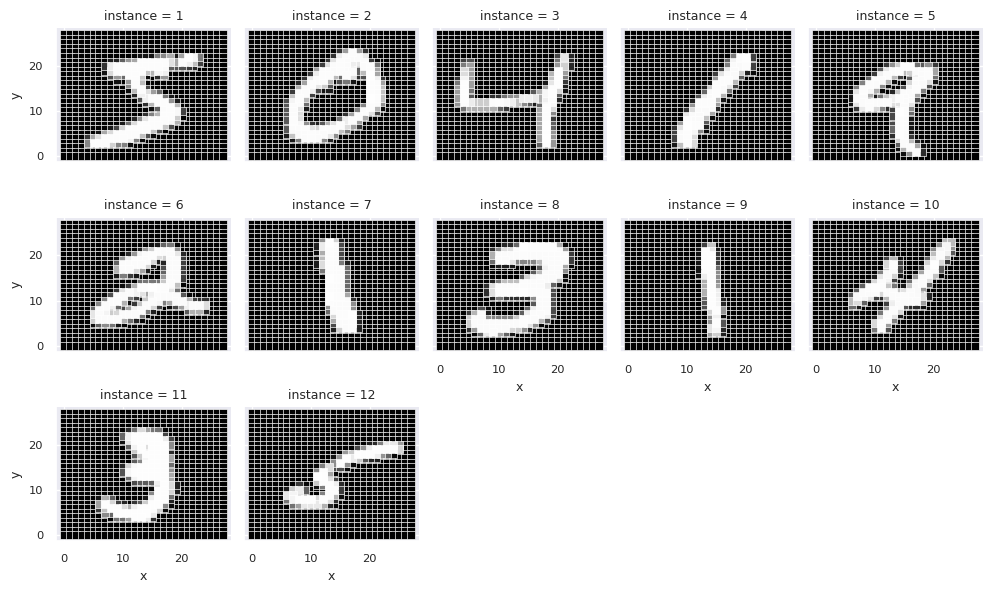

In [41]:
g = sns.FacetGrid(first_12, col="instance", hue="value", col_wrap=5, palette="grey", height=2)
g.map(sns.scatterplot, "x", "y", marker="s")